# Introduction

Li Ziqi is a popular Internet celebrity for her unique style and profound cultural heritage on social media. Her creations are mainly presented in the form of videos, covering fields such as farm work, handicrafts, unique rural scenery, and traditional Chinese cooking.

Li Ziqi is not just a content creator, her works are regarded as living fossils of traditional Chinese culture. She presents ancient crafts and lifestyles to the audience in wonderful pictures, leading people to return to nature and love traditional life way. Her influence is not limited to the China, she has also accumulated a large number of fans internationally and has become one of the outstanding representatives of Chinese cultural export.

The purpose of this project is to understand the popularity of Li Ziqi's videos among international netizens on the YouTube platform. This project intercepted a total of about 6,000 comments from the 5 most played videos for sentiment analysis.

# Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

In [6]:
#!pip install textblob
#!pip install vaderSentiment
#!pip install wordcloud

In [7]:
youtube = pd.read_excel('C:\\Users\\Lenovo\\OneDrive\\AAA Warsaw University\\The 3rd semester\\Text Mining and Social Media Mining\\project\\youtube_English.xlsx')

In [8]:
youtube.head()

,comments,comments_english
0,I love that the sheep and the dogs follows her...,I love that the sheep and the dogs follows her...
1,I've been a fan for over 2 years now. Ever sin...,I've been a fan for over 2 years now. Ever sin...
2,As someone who came here from Stephanie's vide...,As someone who came here from Stephanie's vide...
3,I SUPPORT YOU LIZIQI! I hope you haven't lost ...,I SUPPORT YOU LIZIQI! I hope you haven't lost ...
4,真的好喜歡這集，每一種過年會有的小零嘴都做得很好,I really like this episode. Every snack that i...


In [9]:
youtube = youtube[['comments_english']]

In [10]:
youtube.head()

,comments_english
0,I love that the sheep and the dogs follows her...
1,I've been a fan for over 2 years now. Ever sin...
2,As someone who came here from Stephanie's vide...
3,I SUPPORT YOU LIZIQI! I hope you haven't lost ...
4,I really like this episode. Every snack that i...


# Sentiment analysis model

## Sentiment analysis based on NLTK library directly

NLTK (Natural Language Toolkit) is a Python library for natural language processing (NLP) and text analysis. It provides a rich set of tools and resources for working with human language data.


In [11]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Returns the polarity of sentiment analysis, -1 means negative, 1 means positive, 0 means neutral
    return analysis.sentiment.polarity


In [12]:
# Perform sentiment analysis on the 'comments_english' column and create a new 'sentiment' column
youtube['sentiment'] = youtube['comments_english'].apply(analyze_sentiment)

# 显示处理后的 DataFrame
print(youtube[['comments_english', 'sentiment']])

                                       comments_english  sentiment
0     I love that the sheep and the dogs follows her...   0.500000
1     I've been a fan for over 2 years now. Ever sin...   0.388542
2     As someone who came here from Stephanie's vide...   0.400000
3     I SUPPORT YOU LIZIQI! I hope you haven't lost ...   0.450000
4     I really like this episode. Every snack that i...   0.184091
...                                                 ...        ...
6022          I am in love with this woman. All respect   0.500000
6023                 I miss u liziqi,, please came back   0.000000
6024                     I love u dear I like your work   0.500000
6025                 She makes me wanna be...productive   0.000000
6026   have you ever seen a panda in the bamboo forest?   0.000000

[6027 rows x 2 columns]


In [13]:
sentiment_counts = youtube['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')).value_counts()
print(sentiment_counts)

Positive    4361
Neutral     1345
Negative     321
Name: sentiment, dtype: int64


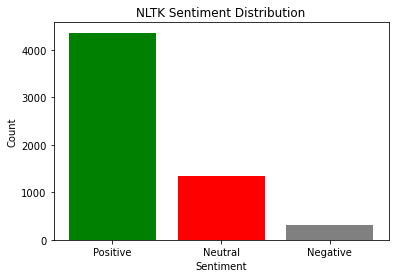

In [14]:


# 创建柱形图
labels = sentiment_counts.index
counts = sentiment_counts.values
colors = ['green', 'red', 'gray']

plt.bar(labels, counts, color=colors)

# 添加标签和标题
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('NLTK Sentiment Distribution')

# 显示图表
plt.show()

Directly NLTK library were 4361 comments classified as positive sentiment, 1345 comments as neutral sentiment, and 321 comments as negative sentiment. This statistic reflects the overall sentiment of netizens towards Li Ziqi, showing that positive sentiments dominate.




## VADER Sentiment Analyzer


In [15]:
analyser = SentimentIntensityAnalyzer()

In [16]:
def analyze_sentiments(comment):
    
    sentiment_scores = analyser.polarity_scores(comment)
    
    return sentiment_scores

In [17]:
youtube['sentiment_scores'] = youtube['comments_english'].apply(analyze_sentiments)


In [18]:
pd.set_option('display.max_colwidth', None)
print(youtube[[ 'sentiment_scores']])

                                                    sentiment_scores
0       {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}
1     {'neg': 0.023, 'neu': 0.656, 'pos': 0.321, 'compound': 0.9855}
2         {'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.8471}
3        {'neg': 0.047, 'neu': 0.453, 'pos': 0.5, 'compound': 0.972}
4       {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.5984}
...                                                              ...
6022      {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.8074}
6023   {'neg': 0.18, 'neu': 0.562, 'pos': 0.258, 'compound': 0.1779}
6024      {'neg': 0.0, 'neu': 0.35, 'pos': 0.65, 'compound': 0.8519}
6025           {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
6026           {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

[6027 rows x 1 columns]


In [19]:
positive_count = 0
neutral_count = 0
negative_count = 0

for index, row in youtube.iterrows():
    sentiment_scores = row['sentiment_scores']
    
    
    if sentiment_scores['compound'] >= 0.05:
        positive_count += 1
    elif sentiment_scores['compound'] <= -0.05:
        negative_count += 1
    else:
        neutral_count += 1


print("VADER Positive Count:", positive_count)
print("VADER Neutral Count:", neutral_count)
print("VADER Negative Count:", negative_count)

VADER Positive Count: 4781
VADER Neutral Count: 788
VADER Negative Count: 458


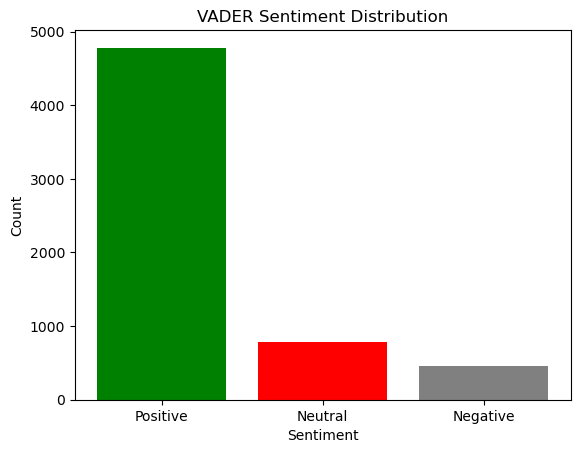

In [46]:

labels = ['Positive', 'Neutral', 'Negative']
counts = [positive_count, neutral_count, negative_count]
colors = ['green', 'red', 'gray']

plt.bar(labels, counts, color=colors)


plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('VADER Sentiment Distribution')

plt.show()

VADER method were 4781 comments classified as positive sentiment, 788 comments as neutral sentiment, and 458 comments as negative sentiment. This statistic reflects the overall sentiment of netizens towards Li Ziqi, showing that positive sentiments dominate.

 ## Word cloud diagram


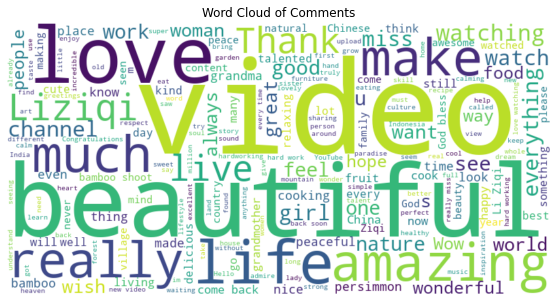

In [20]:
# Draw word cloud diagram
all_comments = ' '.join(youtube['comments_english'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Comments')
plt.show()

## Sentiment analysis prediction

In [ ]:
# Define the stop words
#stop_words = set(stopwords.words('english'))
#custom_stopwords = set(['Li', 'ziqi', "ZiQi",'Li ZiQi',])
#stop_words.update(custom_stopwords)

In [21]:
# Function to extract features
def extract_features(words):
    return dict([(word, True) for word in words])

# Prepare the training features
positive_features = [(extract_features(word_tokenize(comment)), 'Positive') for comment in youtube[youtube['sentiment_scores'].apply(lambda x: x['compound'] > 0.2)]['comments_english']]
negative_features = [(extract_features(word_tokenize(comment)), 'Negative') for comment in youtube[youtube['sentiment_scores'].apply(lambda x: x['compound'] < -0.2)]['comments_english']]
neutral_features = [(extract_features(word_tokenize(comment)), 'Neutral') for comment in youtube[youtube['sentiment_scores'].apply(lambda x: -0.2 <= x['compound'] <= 0.2)]['comments_english']]

# Split the data into training and testing sets (adjust the ratio as needed)
threshold_factor = 0.8
threshold_positive = int(threshold_factor * len(positive_features))
threshold_negative = int(threshold_factor * len(negative_features))
threshold_neutral = int(threshold_factor * len(neutral_features))

# Extract the features
features_train = (
    positive_features[:threshold_positive] +
    negative_features[:threshold_negative] +
    neutral_features[:threshold_neutral]
)
features_test = (
    positive_features[threshold_positive:] +
    negative_features[threshold_negative:] +
    neutral_features[threshold_neutral:]
)



In [22]:
# Train the Naive Bayes classifier
classifier = NaiveBayesClassifier.train(features_train)

accuracy = nltk.classify.accuracy(classifier, features_test)

print(f"Accuracy: {accuracy}")



Accuracy: 0.5986733001658375


### Change the sentence which we want to test

In [23]:
# Test the classifier with a single example
example_text = 'She is an independent girl. That is one of the things that makes me love her best'


In [24]:
example_features = extract_features(word_tokenize(example_text))
predicted_label = classifier.classify(example_features)

print(f"Predicted Label: {predicted_label}")


probdist = classifier.prob_classify(example_features)

# Print predicted sentiment and probability
predicted_sentiment = predicted_label
print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Probability: {round(probdist.prob(predicted_sentiment), 2)}")

Predicted Label: Positive
Predicted Sentiment: Positive
Probability: 0.99


Use the NaiveBayesClassifier model to perform sentiment analysis and prediction on new sentences. The prediction results in the above examples are relatively good. However, because there are many more positive data than negative data in the data, it may cause oversaturation and incomplete model training. But according to the original data set, the model is quite successful.

# Conclusion

From the sum of the above results, it can be seen that foreigners still have a considerable favorable impression of Li Ziqi. No matter which algorithm is used, it can be seen that the vast majority of YouTube video comments are positive. Of course, if computing power permits, more data sets can be analyzed, and the results should be more accurate.